In [67]:
# THis is an implementation of prediction on weather data using keras

In [68]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [69]:
# reading data from csv
df=pd.read_csv('json files/combined_data.csv')[0::22]
df.head()

# converting the date column to datetime
date_time = pd.to_datetime(df[['year','month','day','hour']], format='%Y-%m-%d %H:%M:%S')
df.drop(['month','day','hour','zone','longitude','latitude','aqi'], axis=1, inplace=True)
df['year'] = date_time

# reanaming year to date
df.rename(columns={'year':'Date Time'}, inplace=True)
df.head()

# reindexing the 

# now data set is prepared in desired form

,Date Time,co,no,no2,o3,so2,pm2_5,pm10,nh3,temperature,dewpt
0,2021-01-01 00:00:00,4058.84,30.40,42.16,0.00,9.78,395.20,484.22,26.35,5.6,4.3
22,2021-01-01 01:00:00,5447.39,63.48,44.55,0.00,12.16,488.46,585.86,27.11,5.4,4.5
44,2021-01-01 02:00:00,8117.68,135.90,48.67,0.00,16.69,658.20,779.81,33.44,4.4,4.4
66,2021-01-01 03:00:00,11856.08,243.19,59.63,0.05,21.46,863.67,1015.06,39.52,5.3,4.8
88,2021-01-01 04:00:00,12603.76,250.34,83.63,1.23,24.80,883.55,1027.48,41.54,5.7,4.6


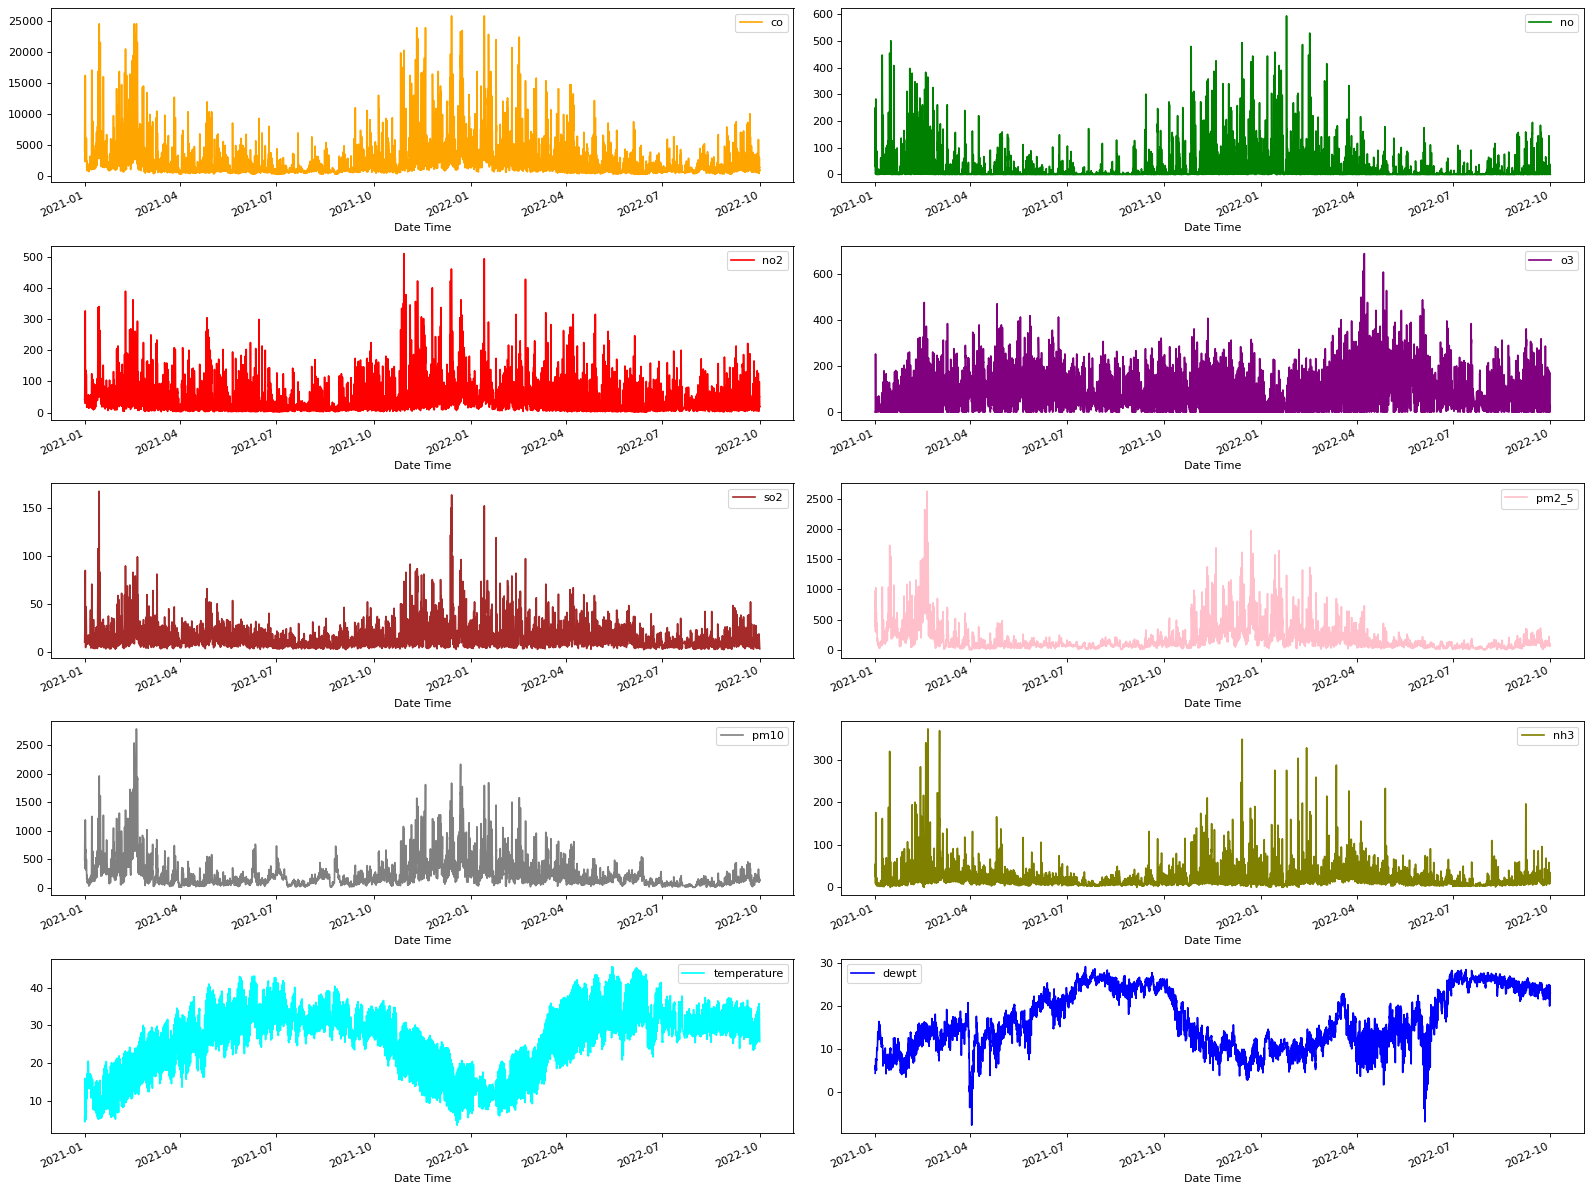

In [70]:
titles = df.columns

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=5, ncols=2, figsize=(20, 15), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(1, len(titles)):
        key = titles[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        i-=1
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


show_raw_visualization(df)